# `Russian Troll Tweets Part-02`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)


<font size=5>**`Help Support The Channel: Patreon @mrfugudatasci`**</font>
    
**`Or Consider: Buy Me A Coffee @mrfugudatasci`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

In [3]:
troll_02=pd.read_csv('troll_tweets_vid02.csv')

troll_02=troll_02.drop(['content','Unnamed: 0'],axis = 1)

troll_02.tail()

,author,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,content without http
2973365,_YOUR_LIFESTYLE,Unknown,Uzbek,9/7/2015 1:31,60,4,412,Other_Tweet,Russian,0,NonEnglish,Санкционный пинг-понг
2973366,_YOUR_LIFESTYLE,Unknown,Russian,9/8/2015 14:49,60,4,416,Other_Tweet,Russian,0,NonEnglish,Горизонтальный кальян NanoSmoke
2973367,_YOUR_LIFESTYLE,Unknown,Russian,9/9/2015 18:52,60,4,418,Other_Tweet,Russian,0,NonEnglish,Фотограф Kai-Hendrik Schroeder
2973368,_YOUR_LIFESTYLE,Unknown,Russian,9/9/2015 22:26,60,4,419,Other_Tweet,Russian,0,NonEnglish,К чему стремится компания Netflix (США)
2973369,_YOUR_LIFESTYLE,Unknown,Russian,9/9/2015 8:17,60,4,417,Other_Tweet,Russian,0,NonEnglish,В Петербурге появилось вегетарианское кафе в к...


In [4]:
tr_eng=troll_02[troll_02['language']=='English']

In [5]:
# forgot to look closer at this yesterday, format names
tr_eng['account_type'].unique()

array(['Right', 'Koch', 'Italian', 'Russian', 'left', 'Unknown', 'German',
       'Hashtager', 'Arabic', 'local', 'Commercial', 'French',
       'ZAPOROSHIA', 'news', 'right', 'Ebola ', 'Spanish', 'Portuguese'],
      dtype=object)

In [6]:
# convert column values to lowercase: 
tr_eng_lwr = tr_eng["account_type"].map(lambda x: x.lower())

In [7]:
tr_eng["account_type"]=tr_eng_lwr

tr_eng['account_type'].unique()

/Users/zatoichi59/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['right', 'koch', 'italian', 'russian', 'left', 'unknown', 'german',
       'hashtager', 'arabic', 'local', 'commercial', 'french',
       'zaporoshia', 'news', 'ebola ', 'spanish', 'portuguese'],
      dtype=object)

# `Plotting to get general idea of further EDA`

In [8]:
# import files and datetime formatting, json parsing
import datetime

pd.set_option('mode.chained_assignment', None) # ignore pandas warning: 
# "A value is trying to be set on a copy of a slice from a DataFrame"

type(tr_eng['publish_date'][0]) # returns string, need to format


# Convert str to date/time with pandas
tr_eng['publish_date']=pd.to_datetime(tr_eng['publish_date'],
                                          infer_datetime_format=True)

tr_eng.sort_values('publish_date',ascending=True)

# Change formating to US dates
tr_eng['publish_date_Only']=tr_eng['publish_date'].dt.strftime('%m/%d/%Y')


tr_eng.head()

,author,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,content without http,publish_date_Only
0,10_GOP,Unknown,English,2017-10-01 19:58:00,1052,9636,253,Other_Tweet,right,0,RightTroll,We have a sitting Democrat US Senator on trial...,10/01/2017
1,10_GOP,Unknown,English,2017-10-01 22:43:00,1054,9637,254,Other_Tweet,right,0,RightTroll,Marshawn Lynch arrives to game in anti-Trump s...,10/01/2017
2,10_GOP,Unknown,English,2017-10-01 22:50:00,1054,9637,255,RETWEET,right,1,RightTroll,Daughter of fallen Navy Sailor delivers powerf...,10/01/2017
3,10_GOP,Unknown,English,2017-10-01 23:52:00,1062,9642,256,Other_Tweet,right,0,RightTroll,JUST IN: President Trump dedicates Presidents ...,10/01/2017
4,10_GOP,Unknown,English,2017-10-01 02:13:00,1050,9645,246,RETWEET,right,1,RightTroll,"19,000 RESPECTING our National Anthem! #StandF...",10/01/2017


In [9]:
# Setup another column: Month/Yr
tr_eng['Month_Yr']=tr_eng['publish_date'].dt.strftime('%m/%Y')


In [10]:
tr_eng.head()

,author,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,content without http,publish_date_Only,Month_Yr
0,10_GOP,Unknown,English,2017-10-01 19:58:00,1052,9636,253,Other_Tweet,right,0,RightTroll,We have a sitting Democrat US Senator on trial...,10/01/2017,10/2017
1,10_GOP,Unknown,English,2017-10-01 22:43:00,1054,9637,254,Other_Tweet,right,0,RightTroll,Marshawn Lynch arrives to game in anti-Trump s...,10/01/2017,10/2017
2,10_GOP,Unknown,English,2017-10-01 22:50:00,1054,9637,255,RETWEET,right,1,RightTroll,Daughter of fallen Navy Sailor delivers powerf...,10/01/2017,10/2017
3,10_GOP,Unknown,English,2017-10-01 23:52:00,1062,9642,256,Other_Tweet,right,0,RightTroll,JUST IN: President Trump dedicates Presidents ...,10/01/2017,10/2017
4,10_GOP,Unknown,English,2017-10-01 02:13:00,1050,9645,246,RETWEET,right,1,RightTroll,"19,000 RESPECTING our National Anthem! #StandF...",10/01/2017,10/2017


In [11]:
type(tr_eng['Month_Yr'][0])

str

In [167]:
# get range to encapsulate before and after election 2016
mask = (tr_eng['publish_date'] > '08/31/2016') &\
(tr_eng['publish_date']  <= '01/01/02017')

tr_en_msk=tr_eng[mask].sort_values('publish_date')

tr_en_msk['publish_date_Only']=pd.to_datetime(tr_en_msk['publish_date_Only'])


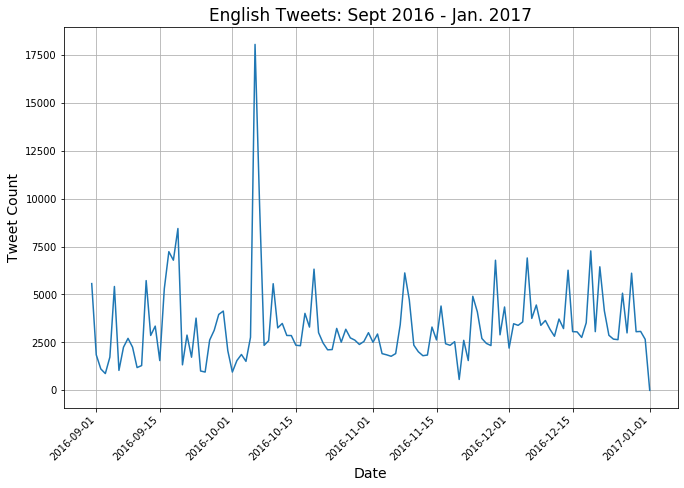

In [168]:
import matplotlib.pyplot as plt # if you don't do .pyplot you get error for labels

plt.figure(figsize=(11,7))

# Count the number of times a date appears and convert to dataframe
tweet_trend = pd.DataFrame(tr_en_msk['publish_date_Only'].value_counts())

# sort dates and get count by date:
dd=pd.to_datetime(tr_en_msk['publish_date_Only']).value_counts().sort_index()

plt.plot(dd)
plt.xticks(rotation=45,ha="right")
plt.title('English Tweets: Sept 2016 - Jan. 2017',fontsize=17)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Tweet Count', fontsize = 14)
plt.grid(True)
plt.show()

# `What is that spike between Oct(01-10),2016?`

+ If we looked at some news articles: https://www.reuters.com/article/us-usa-election-timeline-factbox/timeline-pivotal-moments-in-trumps-presidential-campaign-idUSKBN1341FJ

We will notice that leading up to Oct. 2016 
+ Trump has what are considered 'clashes' with Clinton in front of 10's of millions of people suggesting that she should be imprisoned.
    + Around this time he also mentions border wall and has a meeting with Mexican president.
+ Oct. 7th resurfacing audio/video recording mentions his remarks for grabbing them by the _____. He rebukes the remark but, damage was done and of course Twitter had a hay day..

Then a smaller spike when he won the election:
+ Nov. 8th

`sourced from: Kaggle (user: laurenliz22) who analyzed these tweets`

# `Do same plot for Russians and compare:`

In [150]:
# Due to complications with translating API's and Cost I WILL NOT DO THIS...

# But, I will do a comparison for plotting of tweets during election time

tr_russ=troll_02[troll_02['language']=='Russian']

pd.set_option('mode.chained_assignment', None) # ignore pandas warning: 
# "A value is trying to be set on a copy of a slice from a DataFrame"

# Convert str to date/time with pandas
tr_russ['publish_date']=pd.to_datetime(tr_russ['publish_date'],
                                          infer_datetime_format=True)

tr_russ.sort_values('publish_date',ascending=True)

# Change formating to US dates
tr_russ['publish_date_Only']=tr_russ['publish_date'].dt.strftime('%m/%d/%Y')

mask_russ = (tr_russ['publish_date'] > '08/31/2016') &\
(tr_russ['publish_date']  <= '01/01/02017')


tr_russ_msk=tr_russ[mask_russ].sort_values('publish_date')


tr_russ_msk['publish_date_Only']=pd.to_datetime(tr_russ_msk['publish_date_Only'])

tr_russ_msk.head()

,author,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,content without http,publish_date_Only
2200907,POLITICS_T0DAY,United States,Russian,2016-08-31 00:10:00,110,994,18546,Other_Tweet,Russian,0,NonEnglish,NaN,2016-08-31
2296722,RIAFANRU,Belarus,Russian,2016-08-31 00:30:00,2902,11415,58453,Other_Tweet,Russian,0,NonEnglish,"Экс-президент Польши считает, что страна на гр...",2016-08-31
1313051,INFOREACTOR,United States,Russian,2016-08-31 01:00:00,1549,7661,17620,Other_Tweet,Russian,0,NonEnglish,В Алеппо убит спикер ДАИШ,2016-08-31
2200934,POLITICS_T0DAY,United States,Russian,2016-08-31 01:10:00,110,994,18547,Other_Tweet,Russian,0,NonEnglish,NaN,2016-08-31
1313052,INFOREACTOR,United States,Russian,2016-08-31 01:20:00,1549,7661,17621,Other_Tweet,Russian,0,NonEnglish,Крис Браун угрожал пистолетом одной из своих г...,2016-08-31


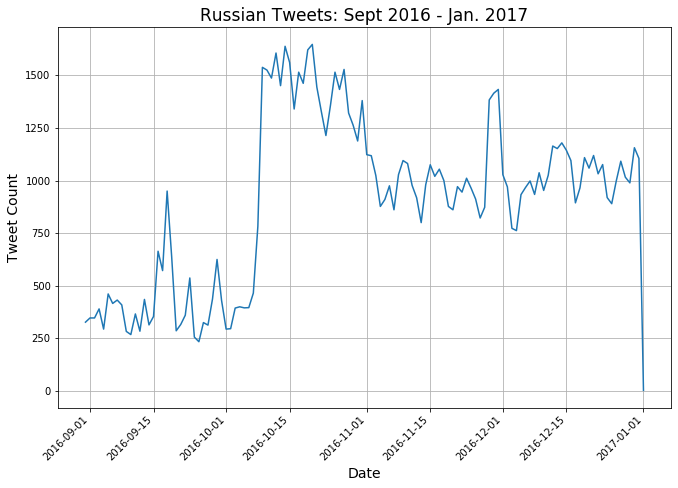

In [149]:
plt.figure(figsize=(11,7))

# sort dates and get count by date:
dd_russ=pd.to_datetime(tr_russ_msk['publish_date_Only']).value_counts().sort_index()

plt.plot(dd_russ)
plt.xticks(rotation=45,ha="right")
plt.title('Russian Tweets: Sept 2016 - Jan. 2017',fontsize=17)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Tweet Count', fontsize = 14)
plt.grid(True)
plt.show()

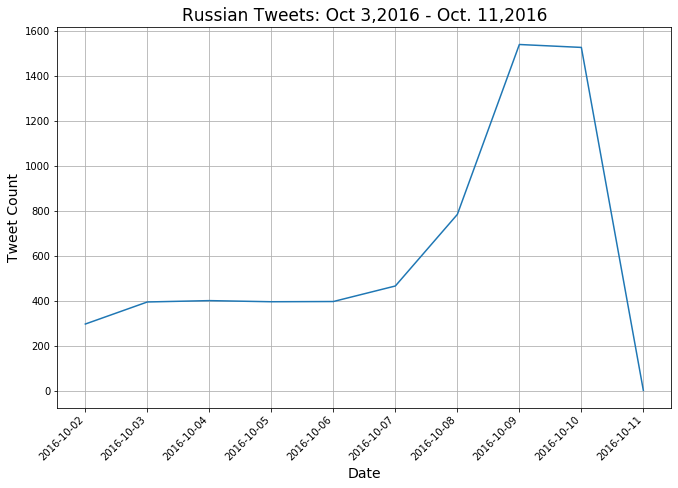

In [158]:
# let's zoom in on Oct 3-11 2016 Russian Tweets:

mask_russ_sub = (tr_russ['publish_date'] > '10/02/2016') &\
(tr_russ['publish_date']  <= '10/11/02016')


tr_russ_msk_sub=tr_russ[mask_russ_sub].sort_values('publish_date')


tr_russ_msk_sub['publish_date_Only']=pd.\
to_datetime(tr_russ_msk_sub['publish_date_Only'])


plt.figure(figsize=(11,7))

# sort dates and get count by date:
dd_russ_sub=pd.to_datetime(tr_russ_msk_sub['publish_date_Only']).value_counts().sort_index()

plt.plot(dd_russ_sub)
plt.xticks(rotation=45,ha="right")
plt.title('Russian Tweets: Oct 3,2016 - Oct. 11,2016',fontsize=17)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Tweet Count', fontsize = 14)
plt.grid(True)
plt.show()

# `There seems to be a trend:`

+ But, you have to be careful of what/how you interpret! I did this to illustrate something.
    + We can see that the dates show an incline based on what we see for the English plot, but we don't know the context of Russian media coverage.

    + To investigate we need to evaluate what was said in Russian Media and Translate the tweets. 

In [ ]:
# Do the moving 30 average and Trump important dates

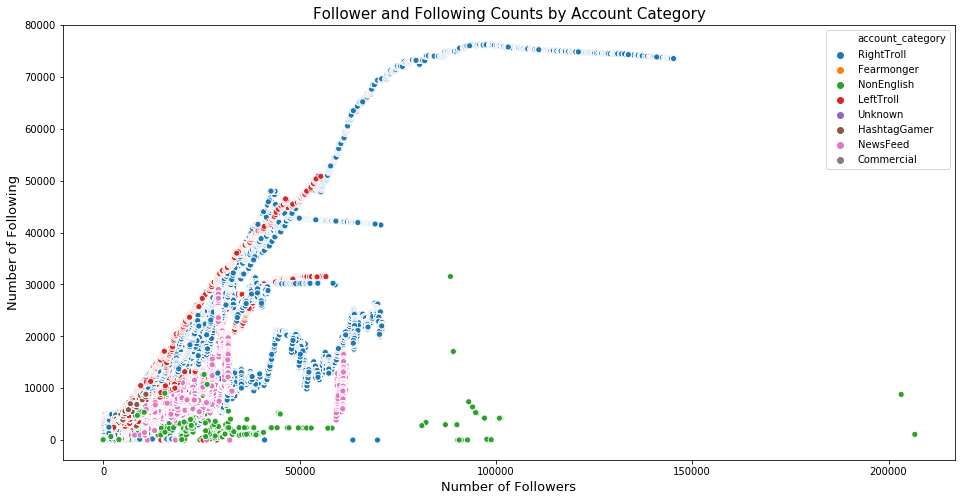

In [364]:
#account_category
import seaborn as sns

plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="followers", y="following", hue="account_category",data=tr_eng)
plt.title('Follower and Following Counts by Account Category', fontsize = 15)
plt.xlabel('Number of Followers', fontsize = 13)
plt.ylabel('Number of Following', fontsize = 13)
plt.legend(loc = 'best')

# `Evaluate top 10 Users over time`

In [192]:
tr_en_msk['author'].value_counts()[:10].index


Index(['AMELIEBALDWIN', 'HYDDROX', 'WORLDOFHASHTAGS', 'CHRIXMORGAN',
       'KANSASDAILYNEWS', 'CHICAGODAILYNEW', 'WORLDNEWSPOLI', 'SCREAMYMONKEY',
       'JAVONHIDP', 'BRIANAREGLAND'],
      dtype='object')

In [360]:


top_ten_auth_dtrng=list(tr_en_msk['author'].value_counts()[:10].index)

sub_en_auth=tr_en_msk.loc[:,['author','publish_date_Only','followers','following']]

top10_author_by_dte=sub_en_auth[sub_en_auth['author'].isin(top_ten_auth_dtrng)]


mi=top10_author_by_dte.sort_values(['publish_date_Only','author']).\
groupby(['publish_date_Only','author']).max()
mi

followers  following
publish_date_Only author                               
2016-08-31        BRIANAREGLAND          746        658
                  CHICAGODAILYNEW      19510      10039
                  CHRIXMORGAN          17350      11727
                  JAVONHIDP              836        718
                  KANSASDAILYNEWS      25413       7498
...                                      ...        ...
2016-12-31        HYDDROX               2271       2591
                  JAVONHIDP              826        450
                  KANSASDAILYNEWS      25320       4269
                  WORLDNEWSPOLI         3058       3322
2017-01-01        WORLDNEWSPOLI         3061       3321

[887 rows x 2 columns]

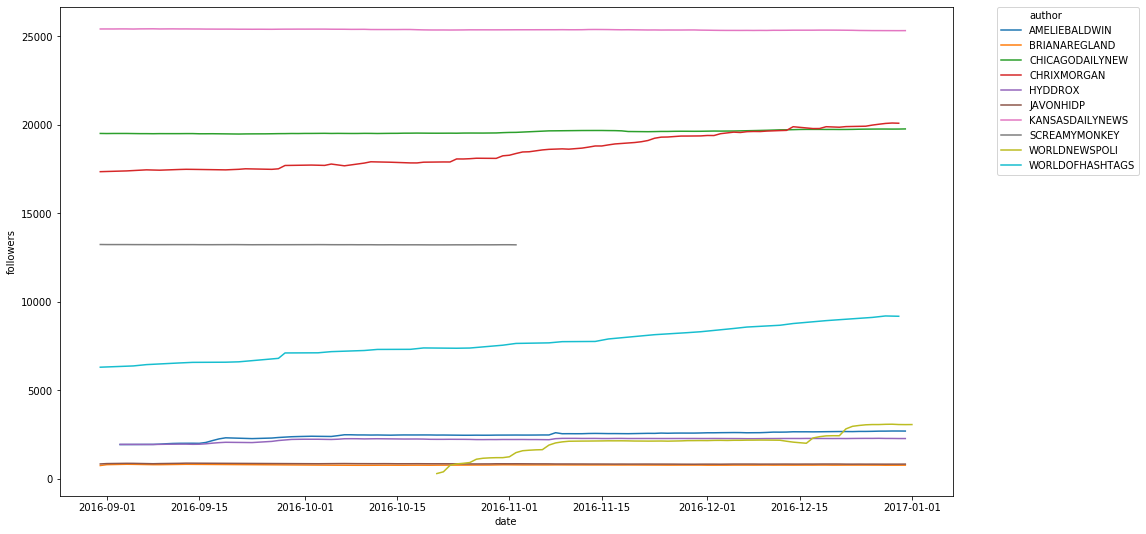

In [375]:

f=pd.DataFrame(list(mi.index),columns=['date','author'])

followers=pd.DataFrame(list(mi['followers']),columns=['followers'])
following=pd.DataFrame(list(mi['following']),columns=['following'])

pp=pd.concat([f,followers,following],axis=1).sort_values(['author','date'])


plt.figure(figsize=(16,9))
sns.lineplot(data=pp, x="date", y="followers", hue="author")
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


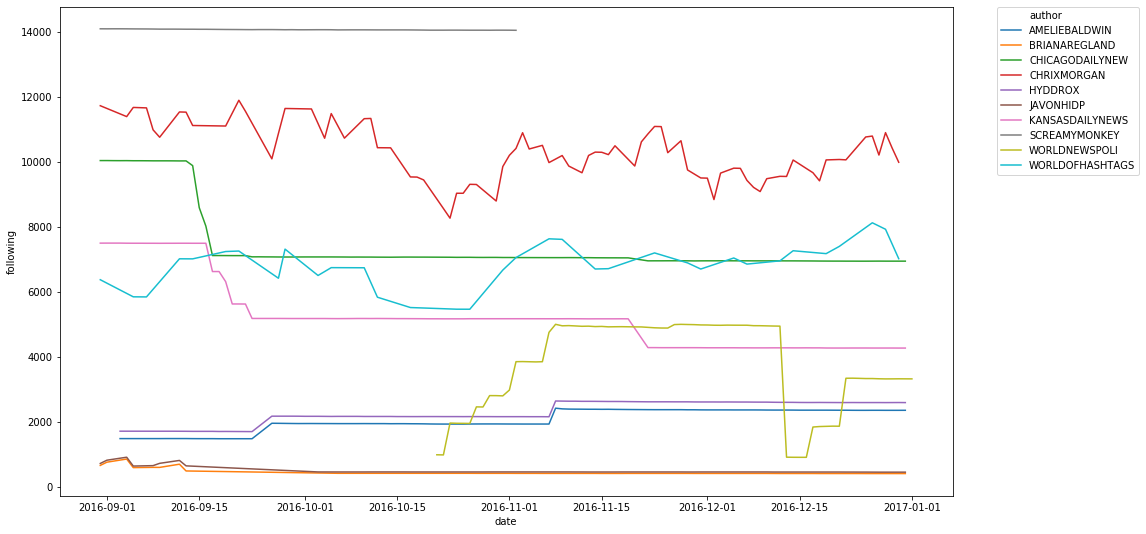

In [373]:
plt.figure(figsize=(16,9))
sns.lineplot(data=pp, x="date", y="following", hue="author")

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [148]:
# Plot real quick:
# account type with pandas
# Then plot with what account types tweeted most by most tweeted day in Oct.

In [ ]:
# Decide what tasks to do for NLP:
# mean or neutral tweets by day
# Word Cloud

# <font color=red>Like</font>, Share &

# <font color=red>SUB</font>scribe

<font size=5>**`Help Support The Channel: Patreon @mrfugudatasci`**</font>
    
**`Or Consider: Buy Me A Coffee @mrfugudatasci`**

# `Citations & Help:`

# ◔̯◔

`Batch Language Translating Google`

https://cloud.google.com/translate/docs/advanced/batch-translation#translate_v3_batch_translate_text-python

https://builtvisible.com/rapid-bulk-translation-in-excel-with-the-google-translate-api/

https://www.dataquest.io/blog/settingwithcopywarning/ (dealing with pandas warning above)

https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

https://stackoverflow.com/questions/63677950/attributeerror-module-matplotlib-has-no-attribute-xlabel

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot